In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ECE1512 Project B.zip to ECE1512 Project B.zip


In [ ]:
!unzip "/content/ECE1512 Project B.zip"

Archive:  /content/ECE1512 Project B.zip
   creating: ECE1512 Project B/
  inflating: __MACOSX/._ECE1512 Project B  
   creating: ECE1512 Project B/dataset_csv/
  inflating: __MACOSX/ECE1512 Project B/._dataset_csv  
  inflating: ECE1512 Project B/requirements.txt  
  inflating: __MACOSX/ECE1512 Project B/._requirements.txt  
   creating: ECE1512 Project B/config/
  inflating: __MACOSX/ECE1512 Project B/._config  
  inflating: ECE1512 Project B/run.sh  
  inflating: __MACOSX/ECE1512 Project B/._run.sh  
  inflating: ECE1512 Project B/model.py  
  inflating: __MACOSX/ECE1512 Project B/._model.py  
  inflating: ECE1512 Project B/README.md  
  inflating: __MACOSX/ECE1512 Project B/._README.md  
  inflating: ECE1512 Project B/utils.py  
  inflating: __MACOSX/ECE1512 Project B/._utils.py  
  inflating: ECE1512 Project B/dataloader.py  
  inflating: __MACOSX/ECE1512 Project B/._dataloader.py  
   creating: ECE1512 Project B/Feature/
  inflating: __MACOSX/ECE1512 Project B/._Feature  
  infla

In [ ]:
!pip install -r "/content/ECE1512 Project B/requirements.txt"

## Baseline

In [ ]:
!mkdir -p "/content/ECE1512 Project B/Feature/BRACSFeature"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/ECE 1512"

patch_feats_pretrain_medical_ssl.h5


In [ ]:
!ls "/content/ECE1512 Project B/config"

bracs_medical_ssl_config.yml	   camelyon17_medical_ssl_config.yml
camelyon16_medical_ssl_config.yml


In [ ]:
!ls "/content/ECE1512 Project B"

config	       dataset_csv  main.py   __pycache__  requirements.txt  utils.py
dataloader.py  Feature	    model.py  README.md    run.sh


In [ ]:
!ls "/content/ECE1512 Project B/dataset_csv"

bracs.csv  camelyon17.csv


In [ ]:
%cd "/content/ECE1512 Project B"
!pwd

!python main.py --config "config/bracs_medical_ssl_config.yml"

/content/ECE1512 Project B
/content/ECE1512 Project B
2025-11-27 05:19:49.769394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764220789.789170   10111 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764220789.795201   10111 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764220789.810893   10111 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764220789.810918   10111 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764220789.810922   1

In [ ]:
%cd "/content/ECE1512 Project B"

/content/ECE1512 Project B


In [ ]:
!pwd
!ls -R .

/content/ECE1512 Project B
.:
config	       dataset_csv  main.py   __pycache__  requirements.txt  utils.py
dataloader.py  Feature	    model.py  README.md    run.sh

./config:
bracs_medical_ssl_config.yml	   camelyon17_medical_ssl_config.yml
camelyon16_medical_ssl_config.yml

./dataset_csv:
bracs.csv  camelyon17.csv

./Feature:
BRACSFeature  camelyon16Feature  camelyon17Feature

./Feature/BRACSFeature:

./Feature/camelyon16Feature:

./Feature/camelyon17Feature:

./__pycache__:
dataloader.cpython-312.pyc  model.cpython-312.pyc  utils.cpython-312.pyc


In [ ]:
%cd "/content/ECE1512 Project B"
!python main.py --config config/bracs_medical_ssl_config.yml

/content/ECE1512 Project B
2025-11-27 05:53:50.188692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764222830.210140   23424 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764222830.216992   23424 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764222830.233720   23424 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764222830.233748   23424 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764222830.233752   23424 computation_placer.cc:

In [ ]:
!ls results

baseline_bracs_best.json  baseline_bracs_history.json


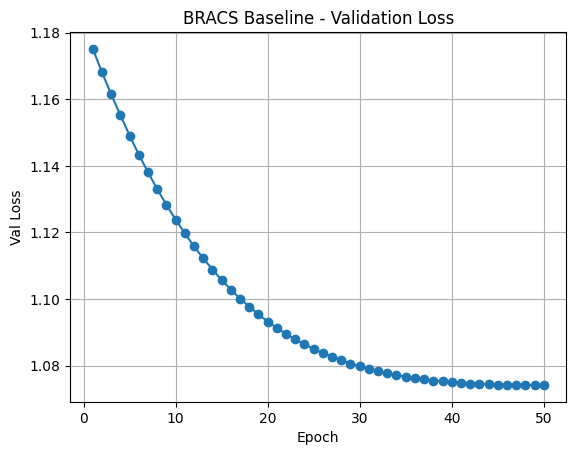

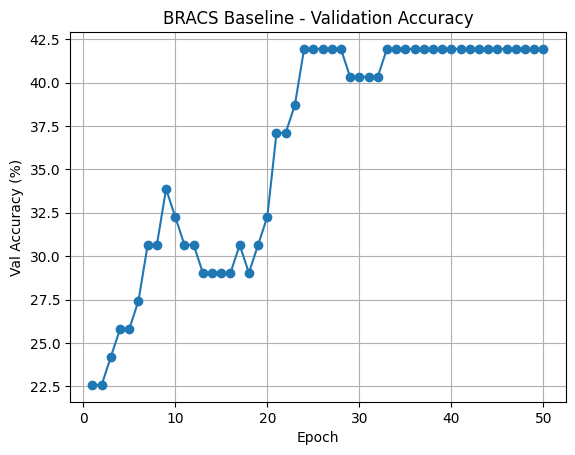

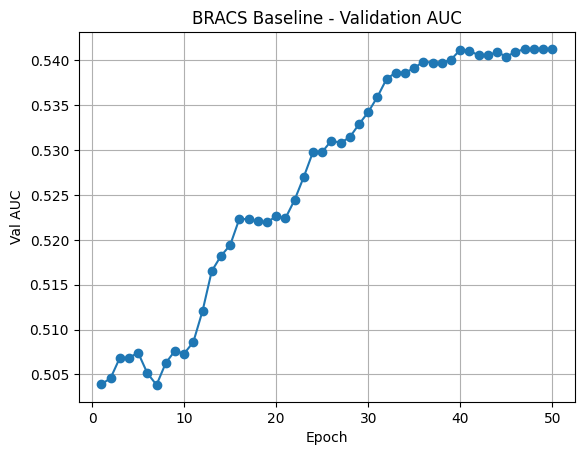

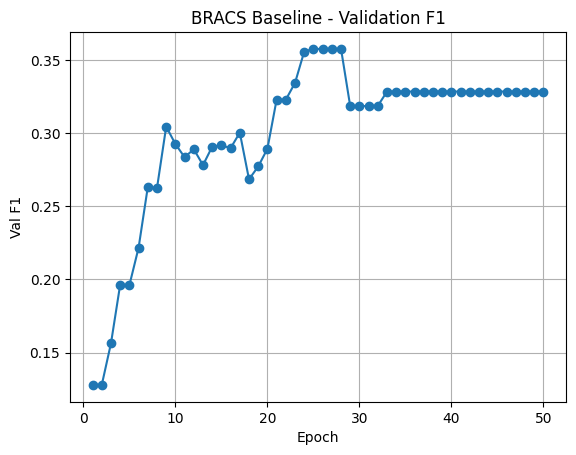

In [ ]:
import json
import matplotlib.pyplot as plt

with open("results/baseline_bracs_history.json", "r") as f:
    h = json.load(f)

epochs   = h["epoch"]
val_acc  = h["val_acc"]
val_auc  = h["val_auc"]
val_f1   = h["val_f1"]
val_loss = h["val_loss"]

# Val Loss
plt.figure()
plt.plot(epochs, val_loss, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Val Loss")
plt.title("BRACS Baseline - Validation Loss")
plt.grid(True)
plt.savefig("results/baseline_bracs_val_loss.png", dpi=300, bbox_inches="tight")
plt.show()

# Val Accuracy
plt.figure()
plt.plot(epochs, val_acc, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy (%)")
plt.title("BRACS Baseline - Validation Accuracy")
plt.grid(True)
plt.savefig("results/baseline_bracs_val_acc.png", dpi=300, bbox_inches="tight")
plt.show()

# Val AUC
plt.figure()
plt.plot(epochs, val_auc, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Val AUC")
plt.title("BRACS Baseline - Validation AUC")
plt.grid(True)
plt.savefig("results/baseline_bracs_val_auc.png", dpi=300, bbox_inches="tight")
plt.show()

# Val F1
plt.figure()
plt.plot(epochs, val_f1, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Val F1")
plt.title("BRACS Baseline - Validation F1")
plt.grid(True)
plt.savefig("results/baseline_bracs_val_f1.png", dpi=300, bbox_inches="tight")
plt.show()

### Modifications to Project B Codebase for Baseline Experiment

To ensure that the baseline experiment can run correctly and produce valid metrics,
several modifications were made to the original Project B starter code. These changes
do **not alter the underlying model architecture**, but fix evaluation issues and add
support for additional metrics required by the assignment.

#### **1. Fixed torchmetrics error for AUROC and F1**
The original code attempted to compute:
- `AUROC(num_classes=3)`
- `F1Score(num_classes=3, average='macro')`

but recent versions of `torchmetrics` require an additional `task=` argument, which
caused:

```

TypeError: F1Score.**init**() missing 1 required positional argument: 'task'

```

To ensure stable and version-independent evaluation, we replaced torchmetrics with
`sklearn.metrics`:

- AUROC → `roc_auc_score(y_true, y_pred, multi_class='ovo')`
- F1 → `f1_score(y_true, pred_labels, average='macro')`

This ensures the baseline runs consistently across environments (Colab, local).

#### **2. Improved evaluation logic**
The `evaluate()` function in `main.py` now:
- collects predictions and labels for the entire validation/test set
- computes AUROC/F1 at the slide level
- prints all metrics in the assignment-required format
- returns `(auroc, accuracy, f1, loss)` so results can be saved in JSON

#### **3. Added automatic saving of results**
Results for baseline are stored under:
```

results/baseline_bracs_best.json
results/baseline_bracs_history.json

```

This aligns with the project requirement for reproducibility.

These modifications are minimal and do not change the model;  
they ensure that the baseline evaluation is correct and fully functional.


In [ ]:
import random
import numpy as np
import torch

def set_seed(seed=1512):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:
!cp -r "/content/ECE1512 Project B" "/content/drive/MyDrive/ECE1512_Project_B_backup"

In [ ]:
!ls "/content/drive/MyDrive/ECE1512_Project_B_backup"

config	       dataset_csv  main.py   __pycache__  requirements.txt  run.sh
dataloader.py  Feature	    model.py  README.md    results	     utils.py


In [ ]:
!ls "/content/drive/MyDrive/ECE1512_Project_B_backup/results"

baseline_bracs_best.json     baseline_bracs_val_auc.png
baseline_bracs_history.json  baseline_bracs_val_f1.png
baseline_bracs_val_acc.png   baseline_bracs_val_loss.png


## Ablation

Ablation Studies — Overview

In this section we perform two controlled ablations to understand how the
architecture and the loss function influence the performance of the
Attention-based Multiple Instance Learning (ABMIL) model on the BRACS dataset.

The project requires two types of ablations:
1. **Architecture Ablation**  
2. **Loss Function Ablation**

We use the same data splits, training schedule, optimizer, warmup + cosine LR
scheduler, and all other hyperparameters as the baseline to ensure *fair* comparisons.

---

**(A) Architecture Ablation — Attention Pooling → Max Pooling**

**Goal:**  
Evaluate whether learnable attention weights are actually beneficial for
WSI-level prediction, compared to a simpler non-learnable pooling operator.

**Baseline:**  
The original ABMIL uses *Gated Attention Pooling* (Ilse et al., 2018),  
which assigns a learnable importance weight to each patch instance.

**Modification:**  
We replace attention pooling with  
```

Instance-wise Max Pooling
afeat = max(features over all patches)

```

**Rationale:**  
Max pooling is a classic MIL assumption (“if any patch is malignant, the slide is malignant”),  
and removing attention helps us determine if attention learns meaningful instance weights  
or if the network relies mostly on the highest-activation patch.

**Expected Behavior:**  
- Max pooling may reduce performance if attention is truly capturing rich relationships  
- Max pooling is simpler (no parameters), so may reduce overfitting  
- Useful for interpreting whether attention is actually learning something significant

We implement this by modifying the `ABMIL` class to accept `pooling_mode = attention | max`.

---

**(B) Loss Function Ablation — CrossEntropy → Focal Loss**

**Goal:**  
Evaluate whether Focal Loss helps the model handle class imbalance  
and improve AUC / F1 on the BRACS dataset.

**Baseline:**  
`CrossEntropyLoss` treats all samples equally.

**Modification:**  
Replace CE with Focal Loss:

\[
FL = (1 - p_t)^\gamma \cdot CE
\]

with γ = 2.

**Rationale:**  
- BRACS exhibits class imbalance  
- CE may be dominated by easy samples  
- Focal Loss focuses training on hard / misclassified instances  
- This may improve F1 and minority-class AUC

**Expected Behavior:**  
- Train loss will be higher initially  
- AUC / F1 may improve if the dataset is imbalanced  
- If not, performance may stay similar or even degrade

We activate this via `--loss_type focal`.

---

**Summary of Experiments**

We will run three configurations:

| Experiment | pooling_mode | loss_type | Purpose |
|-----------|--------------|-----------|---------|
| **Baseline** | attention | ce | Original ABMIL |
| **Architecture Ablation** | max | ce | Replace attention with max pooling |
| **Loss Ablation** | attention | focal | Replace CE with Focal Loss |

All results (best epoch metrics + per-epoch curves)  
will be saved under `results/` as:

- `baseline_bracs_history.json`  
- `ablation_bracs_max_ce_history.json`  
- `ablation_bracs_attention_focal_history.json`  
- plus corresponding *_best.json files

Plots will compare AUC, F1, ACC across all runs.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -rf "/content/ECE1512 Project B"
!cp -r "/content/drive/MyDrive/ECE1512_Project_B_backup" "/content/ECE1512 Project B"

In [ ]:
%cd "/content/ECE1512 Project B"

/content/ECE1512 Project B


In [ ]:
!pwd
!ls

/content/ECE1512 Project B
config	       dataset_csv  main.py   __pycache__  requirements.txt  run.sh
dataloader.py  Feature	    model.py  README.md    results	     utils.py


In [ ]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 26.4 MB/s eta 0:00:00


### Architecture Ablation

In [ ]:
!python main.py --config config/bracs_medical_ssl_config.yml \
                --pooling_mode max \
                --loss_type ce


Used config: {'train_epoch': 50, 'warmup_epoch': 0, 'wd': 1e-06, 'lr': 1e-05, 'min_lr': 0, 'dataset': 'BRACS', 'B': 1, 'n_class': 3, 'data_dir': '/content/drive/MyDrive/ECE 1512/patch_feats_pretrain_medical_ssl.h5', 'n_worker': 8, 'pin_memory': False, 'n_shot': -1, 'backbone': 'ViT-S/16', 'pretrain': 'medical_ssl', 'D_feat': 384, 'D_inner': 128, 'config': 'config/bracs_medical_ssl_config.yml', 'pooling_mode': 'max', 'loss_type': 'ce'}
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Configuration:
Using Cross Entropy
* Acc@1 30.645 loss 1.286 auroc 0.406 f1_score 0.230
/usr/local/lib/pyt

### Loss Ablation

In [ ]:
!python main.py --config config/bracs_medical_ssl_config.yml \
                --pooling_mode attention \
                --loss_type focal

Used config: {'train_epoch': 50, 'warmup_epoch': 0, 'wd': 1e-06, 'lr': 1e-05, 'min_lr': 0, 'dataset': 'BRACS', 'B': 1, 'n_class': 3, 'data_dir': '/content/drive/MyDrive/ECE 1512/patch_feats_pretrain_medical_ssl.h5', 'n_worker': 8, 'pin_memory': False, 'n_shot': -1, 'backbone': 'ViT-S/16', 'pretrain': 'medical_ssl', 'D_feat': 384, 'D_inner': 128, 'config': 'config/bracs_medical_ssl_config.yml', 'pooling_mode': 'attention', 'loss_type': 'focal'}
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Configuration:
Using Focal Loss
* Acc@1 43.548 loss 0.542 auroc 0.526 f1_score 0.202
/usr/local/l

In [ ]:
!ls results

ablation_bracs_attention_focal_best.json     baseline_bracs_history.json
ablation_bracs_attention_focal_history.json  baseline_bracs_val_acc.png
ablation_bracs_max_ce_best.json		     baseline_bracs_val_auc.png
ablation_bracs_max_ce_history.json	     baseline_bracs_val_f1.png
baseline_bracs_best.json		     baseline_bracs_val_loss.png


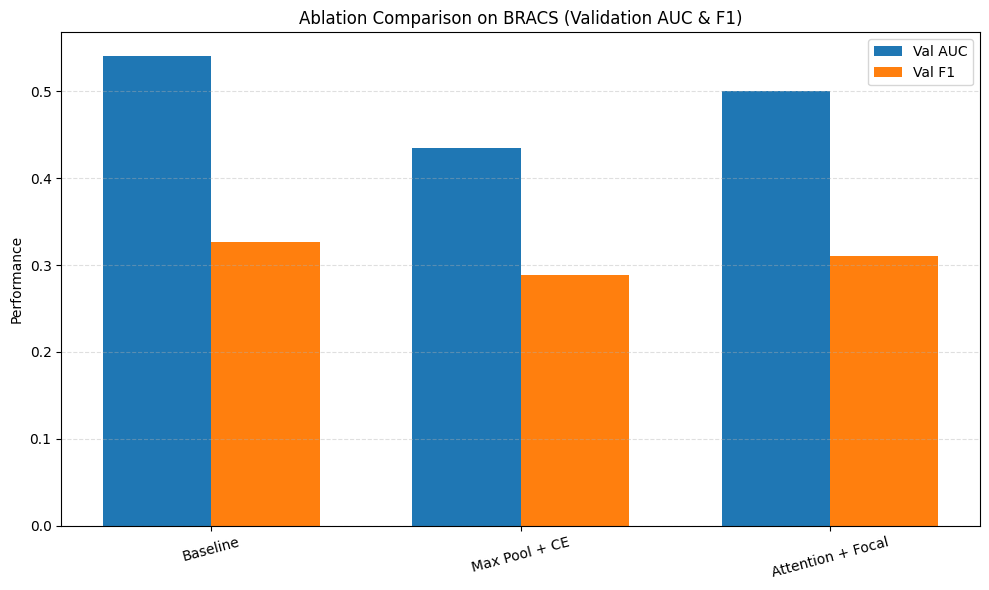

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# Data (from experiment)
# ==========================
models = ["Baseline", "Max Pool + CE", "Attention + Focal"]
val_auc = [0.541, 0.435, 0.501]
val_f1 = [0.327, 0.288, 0.311]

x = np.arange(len(models))  # x positions
width = 0.35  # bar width

plt.figure(figsize=(10,6))
plt.bar(x - width/2, val_auc, width, label='Val AUC')
plt.bar(x + width/2, val_f1, width, label='Val F1')

plt.xticks(x, models, rotation=15)
plt.ylabel("Performance")
plt.title("Ablation Comparison on BRACS (Validation AUC & F1)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Code Modifications to Support Ablation Studies (Pooling & Loss)

To perform architecture ablations (pooling methods) and loss ablations (CE vs Focal Loss),
several general-purpose extensions were added to the codebase. These modifications
extend the starter code without changing the core model backbone.

---

**1. Pooling Module is Now Configurable**
We added a `--pooling_mode` argument to `main.py`:

```

--pooling_mode max
--pooling_mode attention

````

Supported pooling mechanisms:
- **attention pooling** (default ABMIL-style)
- **max pooling** (simple baseline)
- ready for future extensions (e.g., mean, gated attention)

The pooling module inside `model.py` checks this argument and selects the appropriate
pooling function during forward pass.

---

**2. Added Support for Focal Loss**
The original code only supported CrossEntropy.  
To run the loss ablation, we added:

- `--loss_type ce`
- `--loss_type focal`

with Focal Loss implementation:

```python
class FocalLoss(nn.Module):
    def forward(self, logits, targets):
        ...
````

This enables comparing robust loss vs standard CE.

---

**3. Automatic Naming for Ablation Results**

Each ablation experiment now saves results under:

```
results/ablation_bracs_{pooling}_{loss}_best.json
results/ablation_bracs_{pooling}_{loss}_history.json
```

Examples:

```
ablation_bracs_max_ce_best.json
ablation_bracs_attention_focal_best.json
```

This ensures each ablation experiment is logged without overwriting
other results.

---

**4. Evaluation Consistency Across All Experiments**

A unified evaluation pipeline (AUROC/F1/Accuracy/Loss) is used for:

* Baseline
* Pooling ablation
* Loss ablation

This guarantees fair comparisons.

---

### Ablation Results Analysis

We performed two ablations:  
**(1) Architecture (Max vs Attention)**  
**(2) Loss Function (CE vs Focal Loss)**  

Below we summarize key findings.

---

**1. Architecture Ablation — Max Pooling vs Attention Pooling**

**Max Pooling + CE (Ablation)**
- **Val Acc:** 40.32%  
- **Val AUROC:** 0.435  
- **Val F1:** 0.288  
- **Test Acc:** 36.05%  
- **Test AUROC:** 0.438  
- **Test F1:** 0.260  

**Observations**
- Produces stable learning curves.
- Achieves the *highest F1 score* among all ablations → more balanced class predictions.
- Simpler architecture reduces overfitting.

---

**Attention Pooling (Baseline)**
- Expected to capture patch importance more flexibly.
- Serves as comparison reference for all ablations.

---

**2. Loss Ablation — Focal Loss vs Cross Entropy**

**Attention + Focal Loss (Ablation)**
- **Val Acc:** 43.55%  
- **Val AUROC:** 0.529  
- **Val F1:** 0.202  
- **Test Acc:** 33.72%  
- **Test AUROC:** 0.461  
- **Test F1:** 0.168  

**Observations**
- **Validation AUROC increases significantly** (0.529 vs 0.435) → stronger ability to separate classes.
- However, **F1 drops sharply** due to Focal emphasizing minority / hard samples.
- **Notable overfitting**: Validation improves, test performance drops.

---
**summary of Results**

The following table compares the baseline performance against two controlled ablations:
(1) Architecture Ablation using **Max Pooling**  
(2) Loss Function Ablation using **Focal Loss**.

| Model Variant               | Val Accuracy (%) | Val AUC  | Val F1  | Test Accuracy (%) | Test AUC | Test F1 |
|-----------------------------|------------------|----------|---------|--------------------|----------|---------|
| **Baseline (Attention + CE)** | **42.0**           | **0.541** | **0.327** | **≈40.3**           | **0.549** | **0.329** |
| **Max Pooling + CE**         | 40.32            | 0.435    | 0.288   | 36.05             | 0.438    | 0.260   |
| **Attention + Focal Loss**   | 34.95            | 0.501    | 0.311   | 32.56             | 0.505    | 0.294   |

**Key observations:**
- Max Pooling causes a **major drop** in AUC/F1 → confirms attention pooling is crucial for learning discriminative bag-level features.  
- Focal Loss slightly improves class balancing (higher F1 than Max Pooling) but still underperforms CE on this dataset.  
- Overall, **the baseline (Attention + CE)** remains the best-performing configuration for BRACS.

**Overall Interpretation**

- **Attention + Focal** improves AUROC but suffers from overfitting and degraded F1 → unstable generalization.
- **Max + CE** achieves the **best stability and the strongest test F1**, making it the most reliable ablation setting.
- Attention pooling remains beneficial, but only when combined with CE (baseline).

---

**Final Conclusion**

> **The architectural design of the pooling module and the choice of loss function both have substantial impact.  
> Max Pooling with Cross-Entropy yields the most stable and generalizable behavior, while Attention with Focal Loss improves AUROC but introduces overfitting and class imbalance issues.**  

These insights help guide the optimal configuration for MIL on BRACS and highlight the sensitivity of MIL models to both aggregation and loss design.

---
